Building a regression model to predict the price of diamonds given various features. 

data: https://www.kaggle.com/datasets/shivam2503/diamonds/code?datasetId=1312&sortBy=voteCount

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Set2")
import warnings
warnings.filterwarnings('ignore')

In [2]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

## Read in the Data

In [3]:
diamonds = pd.read_csv('diamonds.csv')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Next we will set the 'unnamed:0' column as the index because that is what it appears to be, and check out some summary statistics to better understand the variables.

## Data Preprocessing

In [4]:
diamonds.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,26970.500000,15571.281097,1.0,13485.75,26970.50,40455.25,53940.00
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [5]:
diamonds.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


This dataset includes information about 52,940 diamonds. Each row is an induvidual diamond.

Understanding the continuous variables: 
   - **Carat** ranges from 0.20 to 5.01
        - it is a weight measurement, 1 carat = 0.000440925 lbs
   - **Depth** is a percentage = the hieght of the diamond/ the width of the diamond. 
        - ranges from 43 to 79
   - **Table** is a percentage = the width of the diamonds table (flat surface)/ the diamonds diameter. 
   - **Price** the dependent variable for our regression.
        - The mean price is 3932 and the median is 2401. 
        - The cheapest diamond is 326 and the most expensive is 18,823
   - **x, y, and z** are measurements in mm 
       - x is length, y is width, and z is height 
       - all three have min values of 0, meaning there is likely just no data. We will need to drop those data points.

In [7]:
diamonds.describe(include=object).T

,count,unique,top,freq
cut,53940,5,Ideal,21551
color,53940,7,G,11292
clarity,53940,8,SI1,13065


Understanding the catgeorical variables: 
   - **Cut** Fair, Good, Very Good, Premium, Ideal
   - **Color** from J (worst) to D (best)  
        - (D, E, F, G, H, I, J, K)
   - **Clairty**(I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

In [8]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


There are no missing values in the dataset. All datatypes are either float64 for continous or object for categorical, with the exception of price which is an integer. 

There are no unique identifier colummns that need to be dropped, however the object columns will need to be processed so that they can be used in machine learning and their order is preserved.

In [9]:
drop = diamonds.query('x == 0 or y == 0 or z == 0')

In [10]:
drop.shape

(20, 10)

In [11]:
drop.index

Int64Index([ 2207,  2314,  4791,  5471, 10167, 11182, 11963, 13601, 15951,
            24394, 24520, 26123, 26243, 27112, 27429, 27503, 27739, 49556,
            49557, 51506],
           dtype='int64')

In [12]:
diamonds.drop(drop.index, inplace=True)

In [13]:
diamonds.shape

(53920, 10)

We sucessfully dropped the 20 rows with either x, y, or z as 0.

## Exploratory Data Analysis

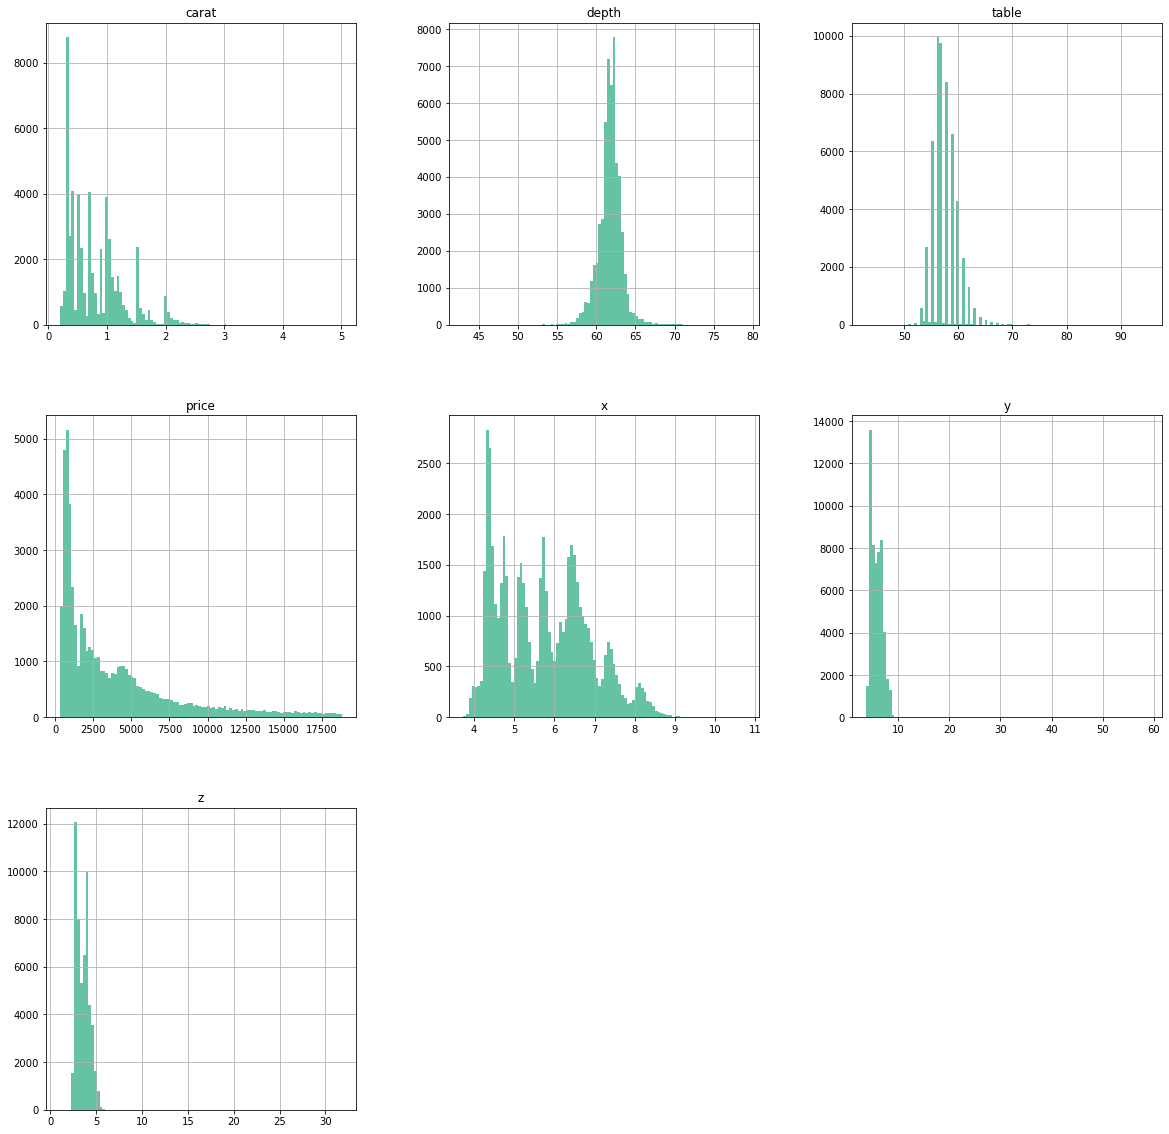

In [14]:
diamonds.hist(figsize=(20,20), bins = 100);

In the above histograms we see the frequency of values in the continous variables. 
- depth and table appear aproximately normally distributed 
- price and carat are positively skewed.
- x appears to be muli-model but generally between 4mm and 10mm. 
- y and z also appear to be typically less than 10 mm however the plots lead me to belive there are some extreme outliers that we aren't seeing. 

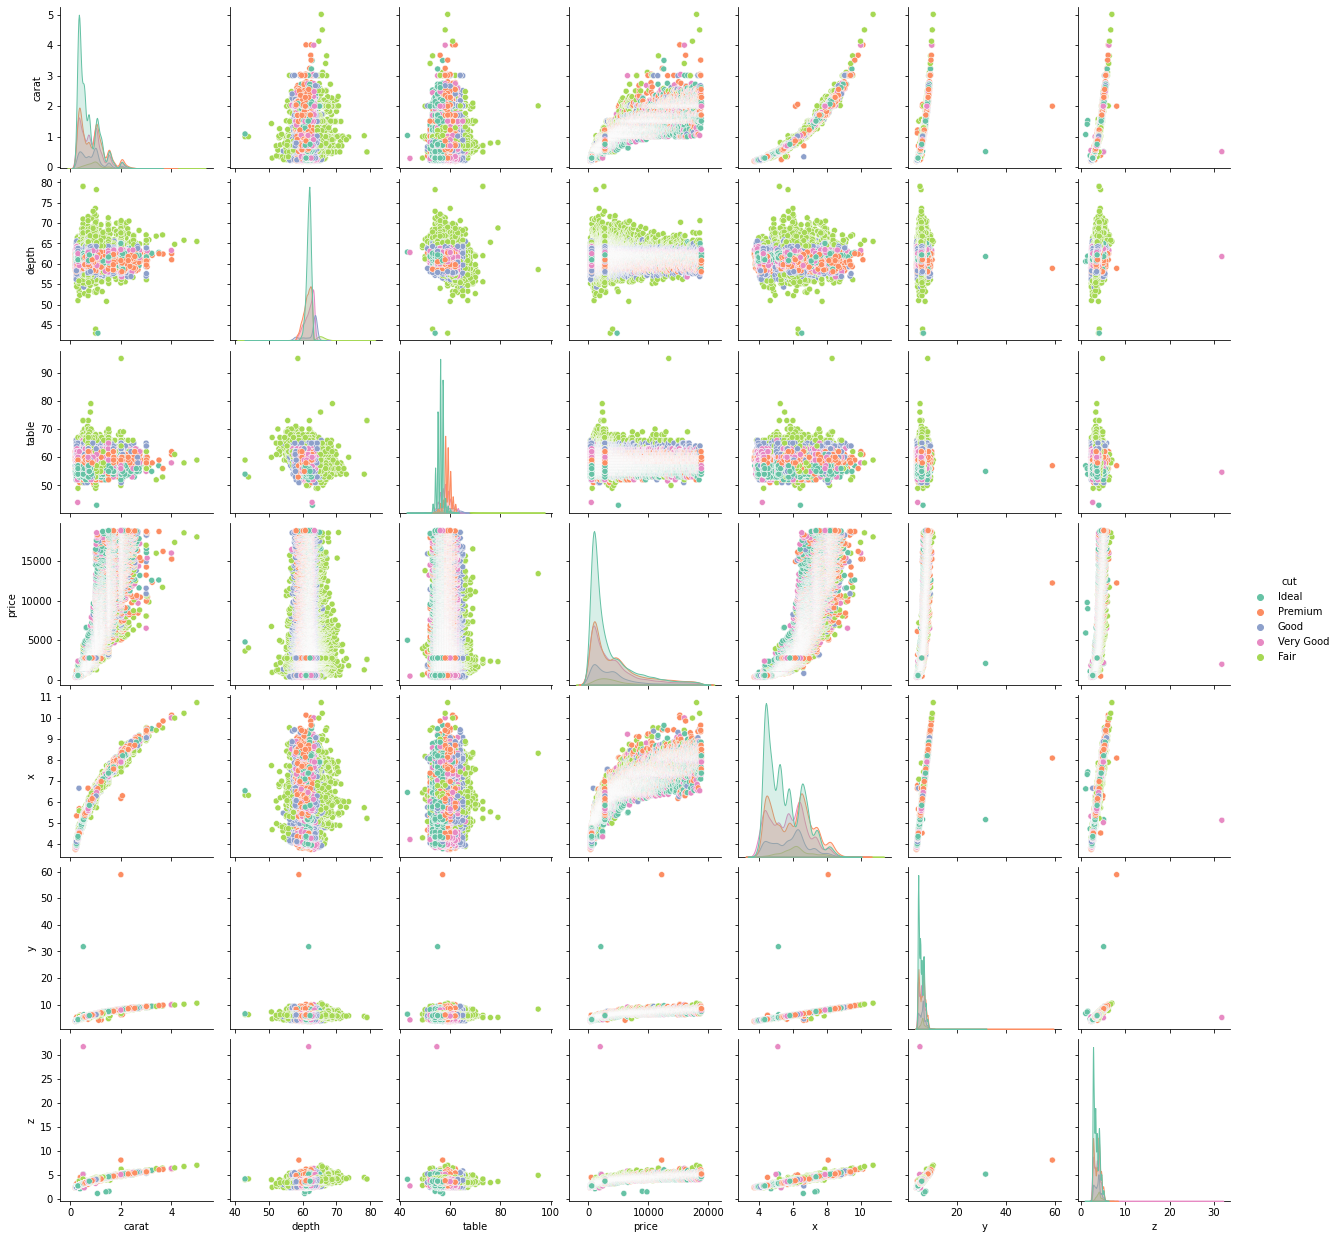

In [15]:
sns.pairplot(diamonds, diag_kind='kde', hue='cut')

In [16]:
diamonds = diamonds[(diamonds["y"]<25)]
diamonds = diamonds[(diamonds["z"]<25)]

There is one point in table that stands out as an outlier. It will be dropped as well.

In [17]:
diamonds = diamonds[(diamonds["table"]<80)]

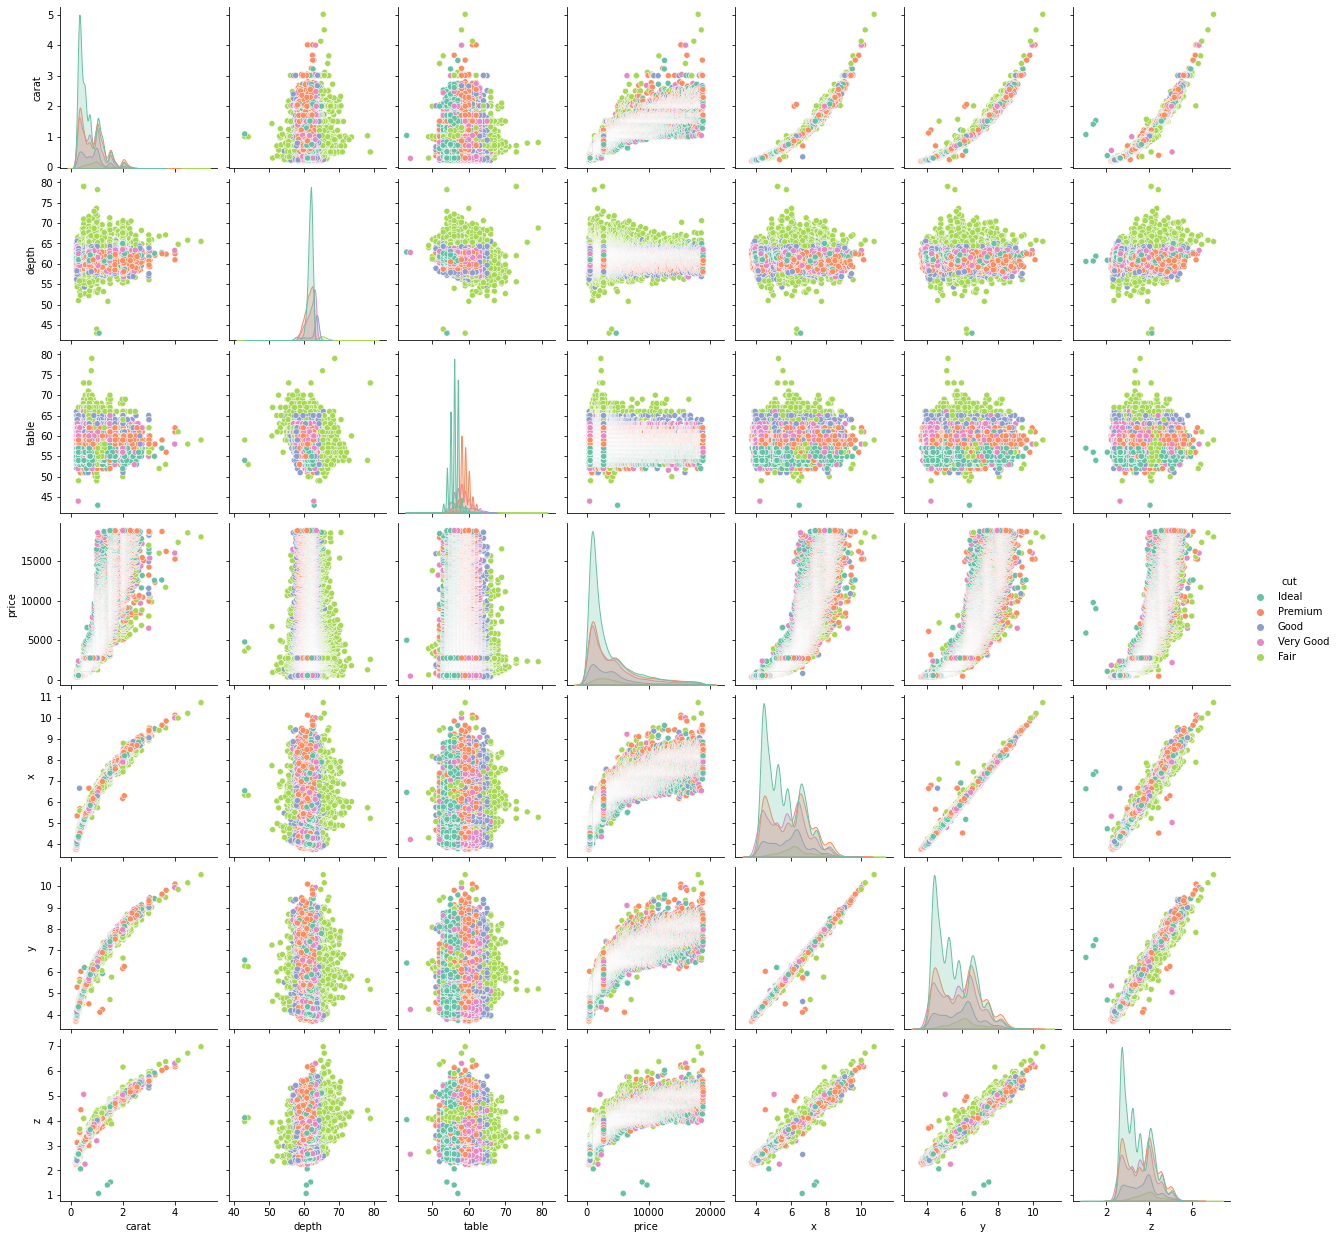

In [18]:
sns.pairplot(diamonds, diag_kind='kde', hue='cut')

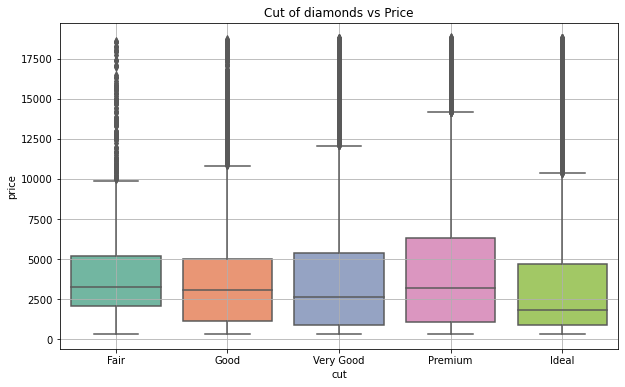

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(y=diamonds["price"],  x=diamonds["cut"], order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.grid(True)
plt.title("Cut of diamonds vs Price")
plt.show()

Interesting I thought the ideal cut would be pricier but apparently it depends more heavily on other factors.

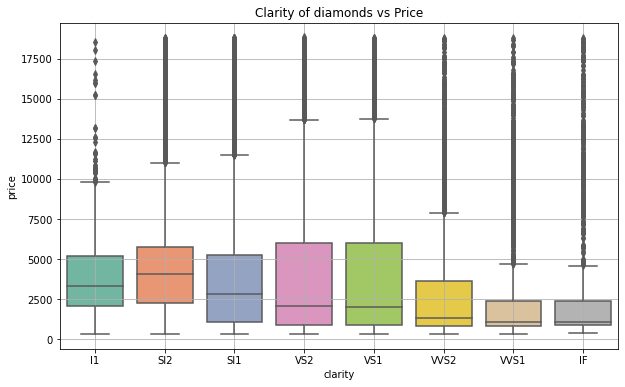

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(y=diamonds["price"],  x=diamonds["clarity"], order=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])
plt.grid(True)
plt.title("Clarity of diamonds vs Price")
plt.show()

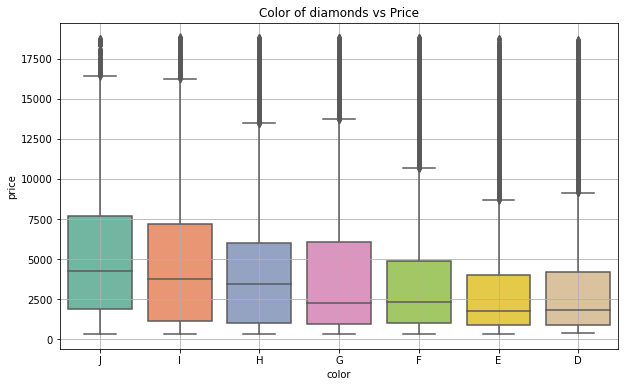

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(y=diamonds["price"],  x=diamonds["color"], order=['J','I','H','G','F','E','D'])
plt.grid(True)
plt.title("Color of diamonds vs Price")
plt.show()

Interesting how the higher end clarity and color actually have the lowest price median, but more outliers. This could be because a lot of people are interested in smaller but higher quality diamonds for enagement rings?

Let's take a look at how many of each color of diamonds are being sold. 

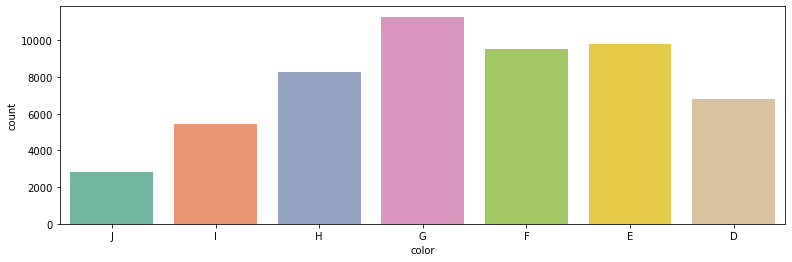

In [22]:
plt.figure(figsize=(13, 4))
sns.countplot(diamonds.color, order=['J','I','H','G','F','E','D']);

- Here we see price and carat are strongly positively correlated (.92)
- x, y, and z are all corelated with each other leading me to belive there is a characteristic diamond shape that big and small diamonds have.
- x y and z are also all strongly positively correlated with carat (.88 and .89).
- We need to be aware these correlations between independent variables avoid multicolinearity. 

## Encoding the Categorical Variables

Encoding the categorical variables while presesrving there ordinal information

In [24]:
data = diamonds.copy()

In [25]:
data.reset_index()
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [26]:
cut_mapper = {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
color_mapper = {'J':1,'I':2,'H':3,'G':4,'F':5,'E':6,'D':7}
clarity_mapper = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

In [27]:
data["cut"] = data["cut"].replace(cut_mapper)
data["color"] = data["color"].replace(color_mapper)
data["clarity"] = data["clarity"].replace(clarity_mapper)

In [28]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53916 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53916 non-null  float64
 1   cut      53916 non-null  int64  
 2   color    53916 non-null  int64  
 3   clarity  53916 non-null  int64  
 4   depth    53916 non-null  float64
 5   table    53916 non-null  float64
 6   price    53916 non-null  int64  
 7   x        53916 non-null  float64
 8   y        53916 non-null  float64
 9   z        53916 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 6.5 MB


Now we see the ordinal categorical variables are now stored as integers (int64) which means they were sucessfully encoded.

## Model Building

First we will split our data with an 80-20 split. 80% for training and 20% for testing.

In [30]:
X= data.drop(["price"],axis =1)
y= data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=8)

In [31]:
X_test

,carat,cut,color,clarity,depth,table,x,y,z
34604,0.27,3,7,5,59.9,58.0,4.17,4.24,2.52
7476,1.07,5,1,3,62.0,56.0,6.53,6.57,4.06
26064,1.65,5,4,5,62.3,55.0,7.56,7.60,4.72
32373,0.34,5,6,5,61.6,55.0,4.50,4.52,2.78
9776,0.91,4,7,3,59.0,61.0,6.35,6.29,3.73
...,...,...,...,...,...,...,...,...,...
31783,0.42,5,6,3,62.6,57.0,4.81,4.84,3.02
19296,1.22,5,3,6,61.8,57.0,6.85,6.89,4.25
47750,0.54,5,7,4,61.1,57.0,5.19,5.29,3.20
38830,0.43,5,6,4,62.0,57.0,4.85,4.82,3.00


In [32]:
X_train = sm.add_constant(X_train)

ols_model_0 = sm.OLS(y_train, X_train)

ols_res_0 = ols_model_0.fit()

print(ols_res_0.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 4.743e+04
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        17:33:21   Log-Likelihood:            -3.6715e+05
No. Observations:               43132   AIC:                         7.343e+05
Df Residuals:                   43122   BIC:                         7.344e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5506.6091    761.901     -7.227      0.0

- We can see that `R-squared` for the model is `0.908`. 
- Not all the variables are statistically significant to predict the outcome variable. To check which are statistically significant or have predictive power to predict the target variable, we need to check the `p-value` against all the independent variables.
- None of the confidence intervals contain 0 which means all variables have a statistically significant impact on the dependent variable price. 
- However, we know that multicollinearity exists in our dataset, so we will need to remove variables. To do this, we will use the variance inflation factor. 

## Removing Multicollinearity

Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent.  

#### How Variance Inflation Factor Works:

For every independent variable in your data:

1. Fit a linear model with that variable as the target, and your other independent variables as features
2. Get the R2 of that model
3. VIF = 1 / (1 - R2)

So if the R2 of a model predicting a certain feature from the other features was 0.8, then the VIF for that feature would be 5.

In [33]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const      17270.208728
carat         24.996416
cut            1.504037
color          1.119975
clarity        1.243958
depth          7.319828
table          1.622907
x            474.865416
y            479.249672
z            390.000865
dtype: float64



In [34]:
X_train_2 = X_train.drop("y", axis=1)
vif_series = pd.Series(
    [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])],
    index=X_train_2.columns,
    dtype=float,
)
print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const      13569.069684
carat         24.991195
cut            1.490074
color          1.119961
clarity        1.237077
depth          5.705164
table          1.584287
x            312.734174
z            305.922859
dtype: float64



In [35]:
X_train_3 = X_train_2.drop("x", axis=1)
vif_series = pd.Series(
    [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])],
    index=X_train_3.columns,
    dtype=float,
)
print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const      5362.427268
carat        24.114065
cut           1.487645
color         1.119950
clarity       1.228913
depth         1.425771
table         1.578505
z            24.434496
dtype: float64



In [36]:
X_train_4 = X_train_3.drop("z", axis=1)
vif_series = pd.Series(
    [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])],
    index=X_train_4.columns,
    dtype=float,
)
print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const      5340.564749
carat         1.299471
cut           1.487113
color         1.117982
clarity       1.204539
depth         1.322559
table         1.577143
dtype: float64



In [37]:
ols_model_1 = sm.OLS(y_train, X_train_4)
ols_res_1 = ols_model_1.fit()
print(ols_res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 6.814e+04
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        17:33:24   Log-Likelihood:            -3.6800e+05
No. Observations:               43132   AIC:                         7.360e+05
Df Residuals:                   43125   BIC:                         7.361e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2853.0135    432.047     -6.603      0.0

**Observations**
- All the VIF Scores are now less than 5 indicating no multicolinearity
- Now all the p values are lesser than 0.05
- The R-Squared value only decreased from 0.908 to 0.905.


## **Predictions on the Test Dataset**

In [38]:
X_test = pd.DataFrame(X_test, columns=X_train_4.columns)
X_test.head()

,const,carat,cut,color,clarity,depth,table
34604,NaN,0.27,3,7,5,59.9,58.0
7476,NaN,1.07,5,1,3,62.0,56.0
26064,NaN,1.65,5,4,5,62.3,55.0
32373,NaN,0.34,5,6,5,61.6,55.0
9776,NaN,0.91,4,7,3,59.0,61.0


In [39]:
test_predictions = ols_res_1.predict(X_test)

test_predictions

34604   NaN
7476    NaN
26064   NaN
32373   NaN
9776    NaN
         ..
31783   NaN
19296   NaN
47750   NaN
38830   NaN
16034   NaN
Length: 10784, dtype: float64

In [40]:
from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train_4, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train_4, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.904 (+/- 0.005)
Mean Squared Error: 1508622.064 (+/- 89737.916)


In [41]:
coef = ols_res_1.params

pd.DataFrame({'Feature' : coef.index, 'Coefs' : coef})

,Feature,Coefs
const,const,-2853.013478
carat,carat,8780.991699
cut,cut,118.654823
color,color,317.941010
clarity,clarity,520.867123
depth,depth,-44.084566
table,table,-25.631468


## The Final Model

In [42]:
Equation = "Price = "

print(Equation, end = '\t')

for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

Price = 	( -2853.013478420613 ) *  const + ( 8780.991698501628 ) *  carat + ( 118.65482278691663 ) *  cut + ( 317.9410102611934 ) *  color + ( 520.8671232941165 ) *  clarity + ( -44.084566286969846 ) *  depth + ( -25.631467631004153 ) *  table + 